In [43]:
import networkx as nx
import readwrite_gml
import matplotlib
import matplotlib.pyplot as plt
# Non Mac users should not try this.
# matplotlib.pyplot.switch_backend('QT4Agg')
ak = readwrite_gml.read_gml('anna.gml',relabel=True)
desc_dict = ak.nodes

In [4]:
ak.nodes

NodeView(('AA', 'AG', 'AL', 'AN', 'AO', 'AP', 'BA', 'BD', 'BE', 'BL', 'BN', 'BO', 'BT', 'CA', 'CB', 'CD', 'CN', 'CO', 'CV', 'DO', 'ED', 'EF', 'FC', 'FR', 'FY', 'GA', 'GO', 'GR', 'GV', 'HA', 'HO', 'IG', 'IV', 'IW', 'JL', 'KA', 'KE', 'KI', 'KO', 'KP', 'KR', 'KT', 'KU', 'KV', 'KY', 'KZ', 'LE', 'LI', 'LK', 'LL', 'LM', 'LP', 'LV', 'MA', 'MB', 'MC', 'MD', 'ME', 'MH', 'MI', 'MJ', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MV', 'MX', 'MY', 'MZ', 'NA', 'ND', 'NI', 'NL', 'NN', 'NS', 'NT', 'NV', 'NY', 'PA', 'PC', 'PD', 'PE', 'PH', 'PK', 'PO', 'PP', 'PR', 'PS', 'PT', 'PV', 'PX', 'PY', 'RT', 'RY', 'SA', 'SE', 'SH', 'SI', 'SL', 'SM', 'SN', 'SO', 'SP', 'SQ', 'SS', 'ST', 'SU', 'SV', 'SY', 'TA', 'TB', 'TC', 'TT', 'TU', 'TV', 'VA', 'VE', 'VF', 'VG', 'VI', 'VK', 'VO', 'VP', 'VR', 'VS', 'VV', 'VY', 'XV', 'YG', 'YK', 'YS', 'YV'))

In [25]:
print(desc_dict['AN'])
desc_dict['AN']['attr_dict']['desc']

{'attr_dict': {'id': 3, 'desc': 'Anna Arkadyevna Karenina, wife of AL', 'label': 'AN'}}


'Anna Arkadyevna Karenina, wife of AL'

## Identifying the edge with the greatest weight

In [7]:
ak.edges(data=True)

EdgeDataView([('AA', 'PX', {'attr_dict': {'value': 0.5}}), ('AA', 'DO', {'attr_dict': {'value': 0.5}}), ('AA', 'VR', {'attr_dict': {'value': 0.5}}), ('AA', 'AN', {'attr_dict': {'value': 6.5}}), ('AG', 'BD', {'attr_dict': {'value': 1.0}}), ('AG', 'NI', {'attr_dict': {'value': 0.5}}), ('AG', 'LE', {'attr_dict': {'value': 7.58}}), ('AG', 'MQ', {'attr_dict': {'value': 0.33}}), ('AG', 'VK', {'attr_dict': {'value': 0.17}}), ('AG', 'PS', {'attr_dict': {'value': 0.42}}), ('AG', 'KI', {'attr_dict': {'value': 3.25}}), ('AG', 'ST', {'attr_dict': {'value': 0.83}}), ('AG', 'DO', {'attr_dict': {'value': 0.42}}), ('AG', 'KZ', {'attr_dict': {'value': 0.83}}), ('AG', 'KO', {'attr_dict': {'value': 0.67}}), ('AL', 'SL', {'attr_dict': {'value': 2.5}}), ('AL', 'MA', {'attr_dict': {'value': 0.1}}), ('AL', 'LI', {'attr_dict': {'value': 4.17}}), ('AL', 'MY', {'attr_dict': {'value': 0.25}}), ('AL', 'BT', {'attr_dict': {'value': 2.58}}), ('AL', 'KO', {'attr_dict': {'value': 0.52}}), ('AL', 'ST', {'attr_dict': {

In [8]:
# Sort the edge list by weight
all_edges = sorted(ak.edges(), key= lambda x: ak.get_edge_data(*x)['attr_dict']['value'], reverse=True)

In [15]:
ak.get_edge_data('AN', 'PX')['attr_dict']['value']

3.0

Now for each edge in the sorted edge list, we print the edge and its weight (number of scenes with that character pair normalized by number of characters in scene).  The edge weights are determined by how many normalized scenes the character pair shared.

In [26]:
# 
from collections import Counter
all_char_ctr = Counter()
for (u,v) in all_edges:
    weight = ak.get_edge_data(u,v)['attr_dict']['value']
    # Keep track of total weights per char [= scene ct]
    for x in (u,v):
        all_char_ctr[x] += weight
    print('%-4s %-4s %.3f %s => %s' % (u,v,weight,desc_dict[u]['attr_dict']['desc'],desc_dict[v]['attr_dict']['desc']))

AN   VR   27.200 Anna Arkadyevna Karenina, wife of AL => Count Alexey Kirillovitch Vronsky, young officer
KI   LE   22.530 Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
LE   ST   17.720 Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe => Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN
KO   LE   14.250 Sergei Ivanovitch Koznishev, half-brother of LE => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
AL   AN   13.330 Alexey Alexandrovitch Karenin, minister of state => Anna Arkadyevna Karenina, wife of AL
KI   PS   11.070 Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE => Princess Shtcherbatskaya, mother of DO and KI
DO   LE   7.970 Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
AG   LE   7.580 Agafea Mihalovna, housekeeper of LE => Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
AL   S

In [27]:
all_char_ctr.most_common(10)

[('LE', 150.98),
 ('AN', 102.98),
 ('KI', 86.98999999999998),
 ('VR', 84.95000000000002),
 ('ST', 80.99),
 ('DO', 57.01000000000002),
 ('AL', 49.01000000000002),
 ('KO', 40.01000000000002),
 ('PS', 31.010000000000012),
 ('PR', 27.98999999999999)]

We draw a graph of the strongest relationships in Anna Karenina.  Arbitrarily we pick the 30 most central edges,
and draw only characters occuring in those edges.  We associate edge weight with a color map; darker blue means 
weightier edge.  The centrality of Levin in many strong relationships emerges.

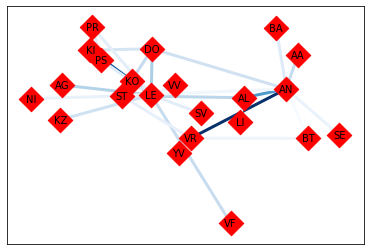

In [29]:
import math
selected_edges = all_edges[:30]

cmap = plt.cm.Blues
new_labels_ak = dict([(char,char) for pair in selected_edges for char in pair])
nodelist = list(new_labels_ak.keys())
sub_ak = ak.subgraph(nodelist)
# Alternative
#selected_edges = sub_ak.edges()
values = [ak.get_edge_data(u,v)['attr_dict']['value'] for (u,v) in selected_edges]
# we're using values for color intensity; need values between 0 and 1, so normalize;
# but values are too spread out, increase the low values by taking sqrt of sqrt.
values = [pow(float(v)/values[0],0.25) for v in values]

#pos = nx.spring_layout(ak,scale=1.0) # The default scale is 1.0
#pos = nx.spring_layout(ak,scale=.75) # Try tweaking the scale and adjusting node positions.
#pos = nx.spring_layout(sub_ak,scale=2.0,weight=None) 
pos = nx.spring_layout(ak,scale=2.0,weight='value') # Increased spring tension for chars with more scenes together
#pos = nx.spring_layout(ak) # Try increasing spring tension for chars with more scenes together
#nx.draw_networkx(ak,pos, with_labels=False,node_size=200,node_color="lightgray")  #Default node size=300

nx.draw_networkx_labels(sub_ak,pos,new_labels_ak,font_size=10,font_color='black')
#nx.draw_networkx_nodes(ak,pos,labels_ak,node_color='salmon',node_size=200)
nx.draw_networkx_nodes(sub_ak,pos,new_labels_ak,node_color='red',node_size=300,label_pos=1.0,node_shape='D',font_size=12)
#nx.draw_networkx_edges(ak,pos,edgelist=selected_edges,edge_color='black',edge_cmp = cmap)
nx.draw_networkx_edges(sub_ak,pos,edgelist=selected_edges,edge_color=values,edge_cmap = cmap,width=3)
#nx.draw_networkx_nodes(ak,pos,new_labels_ak,node_color='red',node_shape='p')

In [ ]:
values

In [13]:
plt.show()

Other parameters to tweak can be found as follows:

In [81]:
?nx.spring_layout

## Degree and betweenness centrality

We now look at degree and betweenness centrality.  These define different notions of character importance and
edge centrality.

In [25]:
bc = nx.betweenness_centrality(ak)
top_chars_bc = sorted(list(bc.items()),key=lambda x: x[1],reverse=True)

In [22]:
dc = nx.degree_centrality(ak)
top_chars_dc = sorted(list(dc.items()),key=lambda x: x[1],reverse=True)

In [26]:
all_chars_il = sorted(list(all_char_ctr.items()), key = lambda x:x[1], reverse=True)
for (char, ct) in all_chars_il:
    print('%4s  %.3f  %s' % (char, ct, desc_dict[char]['desc']))

top_chars_betweenness_centrality = top_chars_bc[:30]
print()
for (ch, ct) in top_chars_betweenness_centrality:
    print('%4s %.3f %s' % (ch, ct, desc_dict[ch]['desc']))

  LE  150.980  Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
  AN  102.980  Anna Arkadyevna Karenina, wife of AL
  KI  86.990  Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE
  VR  84.950  Count Alexey Kirillovitch Vronsky, young officer
  ST  80.990  Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN
  DO  57.010  Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST
  AL  49.010  Alexey Alexandrovitch Karenin, minister of state
  KO  40.010  Sergei Ivanovitch Koznishev, half-brother of LE
  PS  31.010  Princess Shtcherbatskaya, mother of DO and KI
  PR  27.990  Prince Alexander Shtcherbatsky, father of DO and KI
  BT  17.000  Princess Betsy Tverskaya, cousin of VR
  AG  16.000  Agafea Mihalovna, housekeeper of LE
  VK  16.000  Varvara Andreevna (Varenka), adopted daughter of MS
  VV  16.000  Vassenka Veslovsky, distant cousin of KI
  SE  14.000  Sergey Alexeyevitch Karenin (Seryozha), son of AL and AN
  SV  13.970  Nikolay Ivanovitch Sviazhs

In [38]:
M_ak = nx.betweenness_centrality(ak)
il_ak = list(M_ak.items())
il_ak.sort(key=lambda x:x[1],reverse=True)
ak_top_chars_betweenness_dict = dict(il_ak[:10])
for (ch,score) in il_ak[:10]:
    print('%5s  %.3f  %s' % (ch, score, desc_dict[ch]['attr_dict']['desc']))

   LE  0.369  Konstantin Dmitrievitch Levin, proprietor of Pokrovskoe
   VR  0.203  Count Alexey Kirillovitch Vronsky, young officer
   AN  0.198  Anna Arkadyevna Karenina, wife of AL
   ST  0.170  Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN
   KI  0.117  Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE
   DO  0.069  Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST
   AL  0.056  Alexey Alexandrovitch Karenin, minister of state
   PR  0.044  Prince Alexander Shtcherbatsky, father of DO and KI
   YK  0.044  Yegorushka Korsunsky, handsome dancer
   KE  0.024  Prince Kedrov, member of VR's regiment


## Analysis of one character's most important relationships

A new function to help

In [30]:
def print_edge_info (edge_list, source):
    for (st, end) in edge_list[:12]:
      if st == source:
          print('{0} {1:<50} {2:.3f}'.format(end, desc_dict[end]['attr_dict']['desc'],ak.get_edge_data(st,end)['attr_dict']['value']))
      else:
        
          print('{0} {1:<70} {2:.3f}'.format(st, desc_dict[st]['attr_dict']['desc'],ak.get_edge_data(st,end)['attr_dict']['value']))

Let's take a look at that scoundrel Vronsky, by retrieving all edges containing VR.  The following graph method is helpful.

In [31]:
ak.edges('VR')

EdgeDataView([('VR', 'AA'), ('VR', 'AL'), ('VR', 'AN'), ('VR', 'BT'), ('VR', 'CD'), ('VR', 'CN'), ('VR', 'CO'), ('VR', 'CV'), ('VR', 'DO'), ('VR', 'GA'), ('VR', 'GO'), ('VR', 'HA'), ('VR', 'KA'), ('VR', 'KE'), ('VR', 'KI'), ('VR', 'KO'), ('VR', 'KP'), ('VR', 'KU'), ('VR', 'KV'), ('VR', 'LE'), ('VR', 'LI'), ('VR', 'MB'), ('VR', 'MH'), ('VR', 'MI'), ('VR', 'MY'), ('VR', 'NY'), ('VR', 'PO'), ('VR', 'PR'), ('VR', 'PS'), ('VR', 'PT'), ('VR', 'SH'), ('VR', 'SM'), ('VR', 'SO'), ('VR', 'SP'), ('VR', 'ST'), ('VR', 'SV'), ('VR', 'TU'), ('VR', 'TV'), ('VR', 'VA'), ('VR', 'VE'), ('VR', 'VI'), ('VR', 'VP'), ('VR', 'XV'), ('VR', 'YV'), ('VR', 'VV'), ('VR', 'YK'), ('VR', 'VY')])

In [33]:
#VR_edges = [e_pair for e_pair in ak.edges() if 'VR' in e_pair]
VR_edges = list(ak.edges('VR'))
VR_edges.sort(key= lambda x: ak.get_edge_data(*x)['attr_dict']['value'], reverse=True)
print_edge_info(VR_edges, 'VR')

AN Anna Arkadyevna Karenina, wife of AL               27.200
YV Captain Yashvin, gambling friend of VR             6.080
ST Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN 4.450
BT Princess Betsy Tverskaya, cousin of VR             4.080
VA Varya, wife of XV                                  2.830
AL Alexey Alexandrovitch Karenin, minister of state   2.580
XV Alexander Vronsky, brother of VR                   2.500
PT Lieutenant Petritsky, friend of VR                 2.420
GO Golenishtchev, friend of VR                        2.330
KI Princess Ekaterina Alexandrovna Shtcherbatskaya (Kitty), wife of LE 2.200
DO Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST 1.870
CV Countess Vronskaya, mother of VR                   1.670


In [34]:
#AN_edges = [e_pair for e_pair in ak.edges() if 'AN' in e_pair]
AN_edges = list(ak.edges('AN'))
AN_edges.sort(key= lambda x: ak.get_edge_data(*x)['attr_dict']['value'], reverse=True)
print_edge_info(AN_edges, 'AN')

VR Count Alexey Kirillovitch Vronsky, young officer   27.200
AL Alexey Alexandrovitch Karenin, minister of state   13.330
AA Annushka, maid of AN                               6.500
DO Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST 5.870
BA Annie, baby of AN and VR                           5.000
SE Sergey Alexeyevitch Karenin (Seryozha), son of AL and AN 4.250
ST Prince Stepan Arkadyevitch Oblonsky (Stiva), brother of AN 4.000
BT Princess Betsy Tverskaya, cousin of VR             3.580
PX Pyotr, servant of AN                               3.000
GO Golenishtchev, friend of VR                        2.330
LI Countess Lidia Ivanovna, Petersburg dogooder       2.250
MC Mihail, coachman                                   2.000


## The three relationships in the novel's central triangle

In [35]:
print(ak.get_edge_data('AL','VR'))
print(ak.get_edge_data('AN','AL'))
print(ak.get_edge_data('AN','VR'))

{'attr_dict': {'value': 2.58}}
{'attr_dict': {'value': 13.33}}
{'attr_dict': {'value': 27.2}}


## Two important characters with no shared scenes

In [39]:
# Choose from among the characters appearing in most heavily weighted edges
#top_chars = set([x for pair in all_edges[:30] for x in pair])
# Or top by degree centrality
#top_chars = [x for (x,score) in top_chars_degree_centrality]
# Or top by betweenness centrality
top_chars = [x for (x,score) in il_ak[:30]]

In [37]:
top_chars

[u'LE',
 u'VR',
 u'AN',
 u'ST',
 u'KI',
 u'DO',
 u'AL',
 u'PR',
 u'YK',
 u'KE',
 u'SE',
 u'SV',
 u'MI',
 u'LK',
 u'KO',
 u'PS',
 u'YV',
 u'TA',
 u'GR',
 u'BT',
 u'TU',
 u'VV',
 u'VK',
 u'CN',
 u'SM',
 u'TV',
 u'KT',
 u'AG',
 u'CV',
 u'LI']

Let's try finding characters among these that Vronsky never meets:

In [41]:
for x in top_chars: 
    if x != 'VR'and not ak.get_edge_data(x,'VR'):
        print(x, desc_dict[x]['attr_dict']['desc'])

SE Sergey Alexeyevitch Karenin (Seryozha), son of AL and AN
LK Lidi Korsunskaya, wife of YK
TA Tanya, oldest daughter of ST and DO
GR Grisha, young son of ST and DO
VK Varvara Andreevna (Varenka), adopted daughter of MS
KT Professor Katavasov, natural scientist
AG Agafea Mihalovna, housekeeper of LE


Now Anna:

In [42]:
for x in top_chars: 
    if x != 'AN' and not ak.get_edge_data(x,'AN'):
        print(x, desc_dict[x]['attr_dict']['desc'])

PR Prince Alexander Shtcherbatsky, father of DO and KI
KE Prince Kedrov, member of VR's regiment
LK Lidi Korsunskaya, wife of YK
KO Sergei Ivanovitch Koznishev, half-brother of LE
PS Princess Shtcherbatskaya, mother of DO and KI
VK Varvara Andreevna (Varenka), adopted daughter of MS
CN Countess Nordston, friend of KI
TV Turovtsin, party guest
KT Professor Katavasov, natural scientist
AG Agafea Mihalovna, housekeeper of LE
